In [91]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

# MNIST.load_testing() puts the data in some weird data type... 
# convert everything to familiar numpy...
images = np.array(images)
labels = np.array(labels)
testX = np.array(testX)
testY= np.array(testY)

numpy.ndarray

In [93]:
images.shape, labels.shape, testX.shape, testY.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [94]:
digits = labels

In [95]:
digits[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [96]:
digits = np.array(images)

In [97]:
digits.shape

(60000, 784)

In [98]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [99]:
p.shape

(60000, 28, 28)

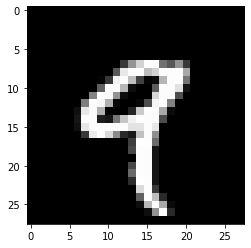

In [101]:
plt.imshow(p[4,::], cmap="gray")

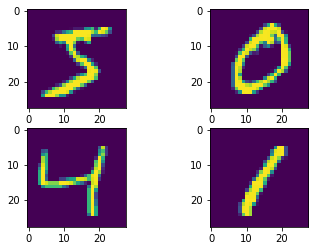

In [102]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

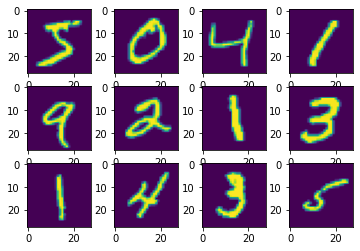

In [104]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(p[i,::])

In [105]:
sample = digits[0:1000,:]

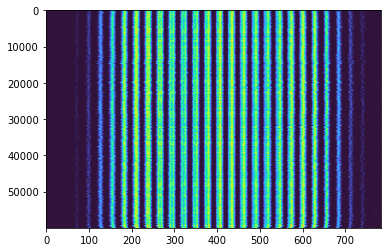

In [106]:
# The image of all the pixels flattened out is jumbled -- it is a mixture of the digits.
plt.imshow(digits, aspect="auto", cmap="turbo")

In [107]:
# I can sort by the labels, and show them grouped by digit.
digitsordered = digits[np.argsort(labels),:]
digits.shape

(60000, 784)

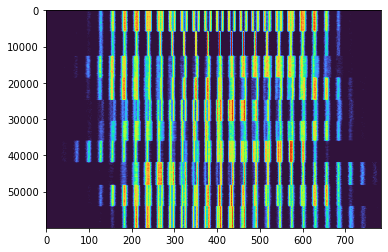

In [108]:
plt.imshow(digitsordered, aspect="auto", cmap="turbo")

Text(33.0, 0.5, 'samples')

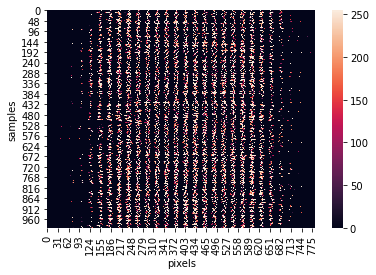

In [109]:
import seaborn as sb
sb.heatmap(sample)
plt.xlabel("pixels")
plt.ylabel("samples")

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


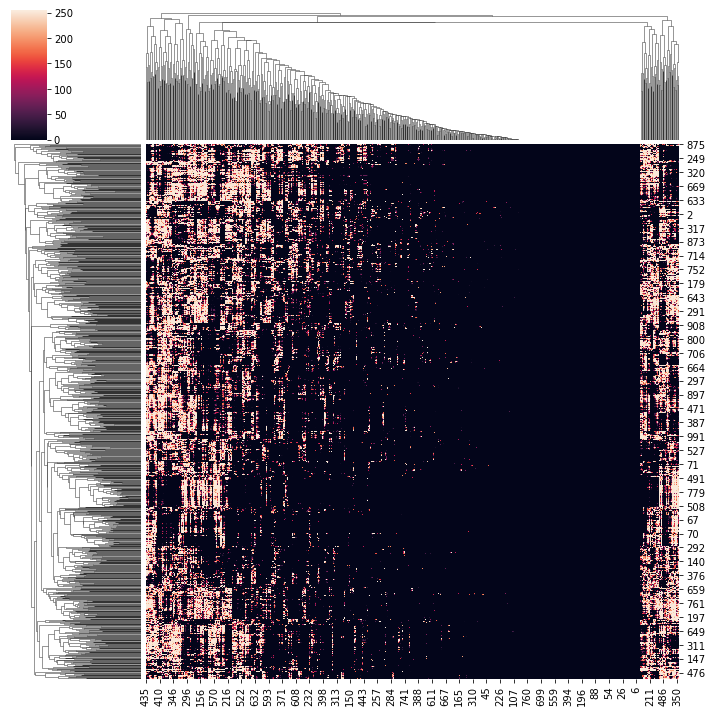

In [110]:
# Wait, this isn't quite what I want.  I want to reorder columns (pixel positions) and rows (sample digits).
sb.clustermap(sample)


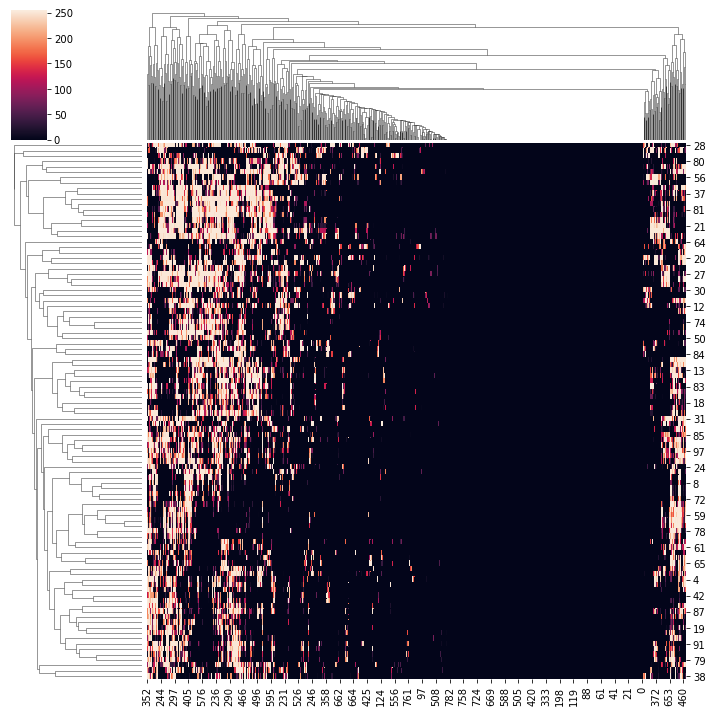

In [111]:
# A little busy, maybe only look at 100 samples?
sb.clustermap(sample[0:100,:])

In [112]:
sb.clustermap(sample[0:100,:], row_colors=labels[0:100])

TypeError: 'numpy.uint8' object is not iterable

<Figure size 720x720 with 0 Axes>

In [113]:
# sb.clustermap wants a list of color names for row_colors.  Fine.  

h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels100 = []
for l in labels[0:100]:
    colorlabels100.append(h[l])
colorlabels100
colorlabels1k = [h[i] for i in labels[0:1000]]
colorlabels= [h[i] for i in labels]

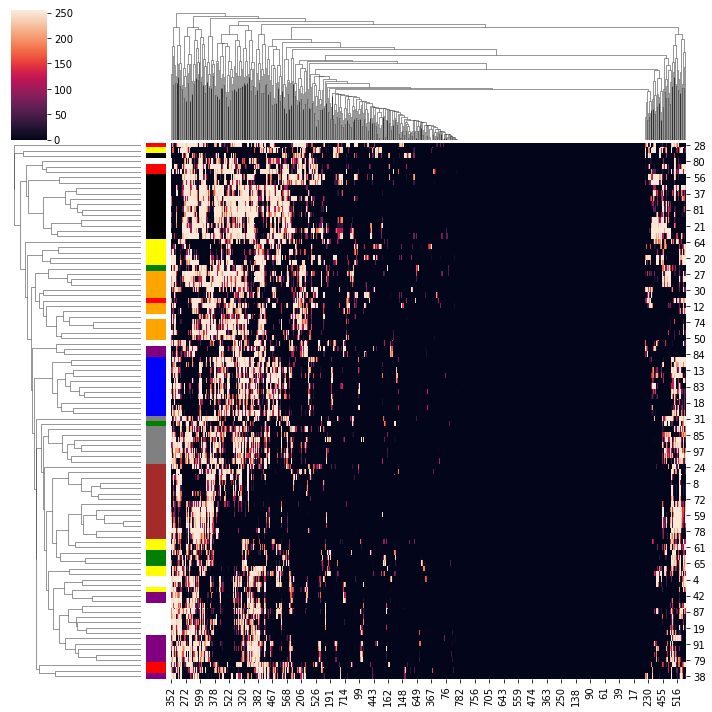

In [114]:
clustermap = sb.clustermap(sample[0:100,:], row_colors=colorlabels100)

In [ ]:
# The clustermap library function gives me the data in attributes of the return value:
dir(clustermap)

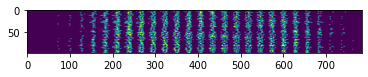

In [115]:
# There is data, which is what I gave it, 
plt.imshow(clustermap.data)

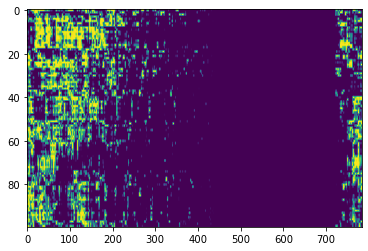

In [116]:
# And data2d, which has been reordered
plt.imshow(clustermap.data2d, aspect="auto")

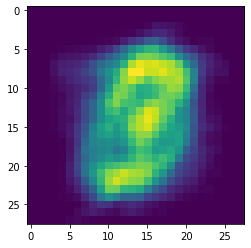

In [117]:
# I can plot what all the digits look like on top of each other
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape( (28,28)))

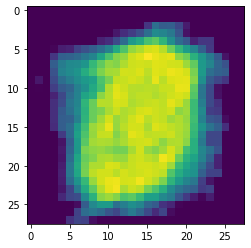

In [118]:
plt.imshow(np.array(clustermap.data.std(axis=0)).reshape( (28,28)))

In [119]:
# And it turns out the indexes for the row- and column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

In [ ]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

In [ ]:
clustermap.dendrogram_col.reordered_ind[0:10]

In [ ]:
digits.shape

In [120]:
# So let's get some pieces of this clustergram and plot them on a 28x28 pixel grid:
middlepixels = clustermap.dendrogram_col.reordered_ind[300:600]
endpixels = clustermap.dendrogram_col.reordered_ind[723:]

In [121]:
middle_image = np.zeros((28,28))
end_image = np.zeros((28,28))

In [122]:
middle_image.reshape((784,))[middlepixels] = 1
end_image.reshape((784,))[endpixels] = 1

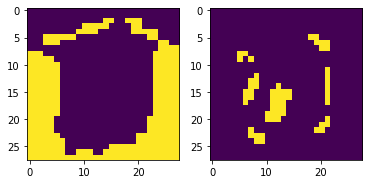

In [123]:
# These are the pixels that were clustered
plt.subplot(121)
plt.imshow(middle_image)
plt.subplot(122)
plt.imshow(end_image)

In [124]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

PCA(n_components=30)

In [ ]:
pca.components_.shape

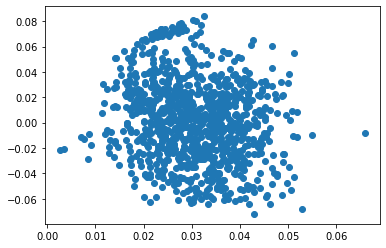

In [125]:
plt.scatter(pca.components_[0,:], pca.components_[1,:])

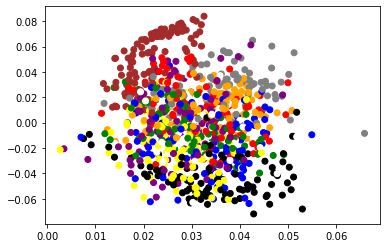

In [126]:
plt.scatter(pca.components_[0,0:1000], pca.components_[1,0:1000], color=colorlabels1k)

In [127]:
# This is a sample of 1000 points. 
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels1k = []
for l in labels[0:1000]:
    colorlabels1k.append(h[l])
colorlabels1k[0:50]

colorlabelsall = []
for l in labels:
    colorlabelsall.append(h[l])
colorlabelsall[0:50]

['green',
 'black',
 'yellow',
 'brown',
 'white',
 'red',
 'brown',
 'orange',
 'brown',
 'yellow',
 'orange',
 'green',
 'orange',
 'blue',
 'brown',
 'purple',
 'red',
 'grey',
 'blue',
 'white',
 'yellow',
 'black',
 'white',
 'brown',
 'brown',
 'red',
 'yellow',
 'orange',
 'red',
 'purple',
 'orange',
 'grey',
 'blue',
 'white',
 'black',
 'green',
 'blue',
 'black',
 'purple',
 'blue',
 'brown',
 'grey',
 'purple',
 'white',
 'orange',
 'white',
 'grey',
 'green',
 'white',
 'orange']

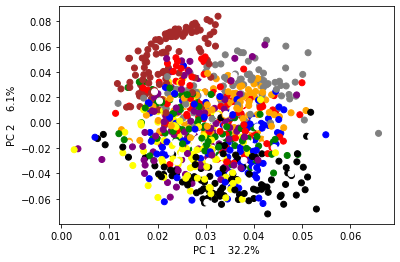

In [128]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels1k)
plt.xlabel("PC 1    "+"{:.1f}".format(pca.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca.explained_variance_ratio_[1] * 100) + "%"); 

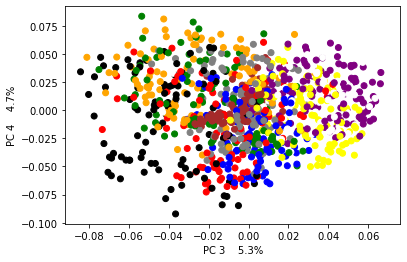

In [129]:
plt.scatter(pca.components_[2,:], pca.components_[3,:], color=colorlabels1k)
plt.xlabel("PC 3    "+"{:.1f}".format(pca.explained_variance_ratio_[2] * 100) + "%"); 
plt.ylabel("PC 4    "+"{:.1f}".format(pca.explained_variance_ratio_[3] * 100) + "%"); 

In [130]:
pca.singular_values_.shape, pca.components_[3].shape

((30,), (1000,))

In [133]:
r = np.dot(sample.T, sample)
r.shape

(784, 784)

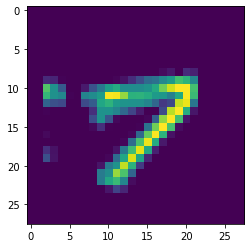

In [135]:
plt.imshow(r.reshape((28,28,-1))[:,:,310])

<ipython-input-136-bc29f7299482>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,5,i+1)


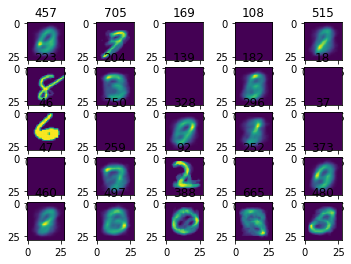

In [136]:
plt.subplot(551)
for i in range(25):
    j  = int(np.random.random()*780)
    plt.subplot(5,5,i+1)
    plt.title(j)
    plt.imshow(r.reshape((28,28,-1))[:,:,j])
    

In [ ]:
samplesample=np.dot(sample, sample.T)


In [ ]:
clustermap = sb.clustermap(samplesample[0:100,:], row_colors=colorlabels100)

In [ ]:
# A little disappointing, 1000 digits fed into PCA and plotted. 
# Let us try TSNE on this 1000 sample by 30-dimensional PCA

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca.components_.T)

In [ ]:
X_embedded

In [ ]:
dir(X_embedded)

In [ ]:
X_embedded.embedding_.shape

In [ ]:
# We want to plot embedding_[:,1] against embedding_[:,0] 
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1])

In [ ]:
# And add label colors
plt.scatter(X_embedded.embedding_[:,0], X_embedded.embedding_[:,1], color=colorlabels1k)

In [ ]:
# This is a little more satisfying than [blind] PCA, but 
# less than perfect.  

In [ ]:
# Fit 50-component PCA on all the data
pca50=PCA(n_components=50)
pca50.fit(digits.T)

In [ ]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [ ]:
pca50.components_.shape

In [ ]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)

In [ ]:
plt.scatter(TSNE1K.embedding_[:,0], TSNE1K.embedding_[:,1], color=colorlabelsall[0:1000])

In [ ]:
TSNE4K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:4000].T)

In [ ]:
plt.scatter(TSNE4K.embedding_[:,0], TSNE4K.embedding_[:,1], color=colorlabelsall[0:4000])

In [ ]:
# Wait, this is qualitatively different from TSNE with n=1k 

# We can see that the TSNE procedure for drawing pretty 2d pictures that 
# reflect concentrations of point density in high dimensional spaces
# is sensitive to number of points and tuning parameters; 
# and be warned, it is not deterministic, so you don't get the
# same clouds each time you run it.  But it sure is pretty.

In [ ]:
TSNE10K = TSNE(n_components=2, learning_rate=1.5, init="random").fit(pca50.components_[:,0:10000].T)

In [ ]:
plt.scatter(TSNE10K.embedding_[:,0], TSNE10K.embedding_[:,1], color=colorlabelsall[0:10000])